## Policy Evaluation

Let's try to evaluate a policy using exact algebraic method and Value iteration method.

The world and the policy are the following:

<img src="http://www.cs.upc.edu/~mmartin/Grid+world.jpg" width="350">


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Define the state matrix
state_matrix = np.zeros((3,4))
state_matrix[0, 3] = 1
state_matrix[1, 3] = 1
state_matrix[1, 1] = -1
print("State Matrix:")
print(state_matrix)


State Matrix:
[[ 0.  0.  0.  1.]
 [ 0. -1.  0.  1.]
 [ 0.  0.  0.  0.]]


Reward Matrix:
[[-0.04 -0.04 -0.04  1.  ]
 [-0.04 -0.04 -0.04 -1.  ]
 [-0.04 -0.04 -0.04 -0.04]]


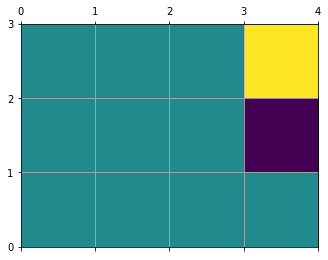

In [3]:
#Define the reward matrix
reward_matrix = np.full((3,4), -0.04)
reward_matrix[0, 3] = 1
reward_matrix[1, 3] = -1
print("Reward Matrix:")
print(reward_matrix)
plt.matshow(reward_matrix,extent=[0, 4, 0, 3])
plt.grid()
plt.show()

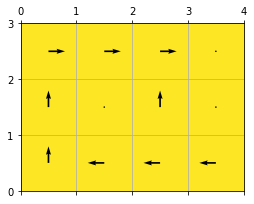

In [4]:
def print_policy(policy_matrix2, V=np.array([]),lstates=[]):
    policy_matrix = policy_matrix2[::-1]
    shape = policy_matrix.shape
    U=np.zeros(policy_matrix.shape)
    R=np.zeros(policy_matrix.shape)
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(policy_matrix[row,col] == -1): 
                U[row,col]=0    
                R[row,col]=0  
            elif(policy_matrix[row,col] == 0): 
                U[row,col]=0    
                R[row,col]=1 
                #policy_string += " ^  "
            elif(policy_matrix[row,col] == 1): 
                U[row,col]=1   
                R[row,col]=0 
                #policy_string += " >  "
            elif(policy_matrix[row,col] == 2): 
                U[row,col]=0    
                R[row,col]=-1 
                #policy_string += " v  "           
            elif(policy_matrix[row,col] == 3):
                U[row,col]=-1   
                R[row,col]=0                 
                #policy_string += " <  "
            elif(np.isnan(policy_matrix[row,col])): 
                U[row,col]=0    
                R[row,col]=0  
                #policy_string += " #  "
    plt.rcParams['figure.figsize'] = (4,3)
    if V.size==0:
        V=np.ones(policy_matrix.shape)
        for x in lstates:
            V[x[0],x[1]]=0.7
        plt.matshow(V,extent=[0, 4, 0, 3],vmin=0, vmax=1)
    else:
        plt.matshow(V,extent=[0, 4, 0, 3])
    plt.grid()
    X, Y = np.meshgrid(np.arange(0.5, 4.5, 1), np.arange(0.5, 3.5, 1))
    Q = plt.quiver(X, Y,U,R)

    plt.show()

policy_matrix = np.array([[1,      1,  1,  -1],
                          [0, np.NaN,  0,  -1],
                          [0,      3,  3,   3]])

print_policy(policy_matrix)

In [5]:
transition_matrix = np.array([[0.8, 0.1, 0.0, 0.1],
                              [0.1, 0.8, 0.1, 0.0],
                              [0.0, 0.1, 0.8, 0.1],
                              [0.1, 0.0, 0.1, 0.8]])


In [6]:
gamma = 0.999

def execute_action(s1,a):
    a=np.random.choice([0,1,2,3],p=transition_matrix[int(a)])    
    row = s1[0]
    col = s1[1]
    if(a == 0): 
        new_col = col + 0
        new_row =row - 1
    elif(a == 1): 
        new_col =col + 1
        new_row =row + 0
    elif(a == 2): 
        new_col =col + 0
        new_row =row + 1      
    elif(a == 3):
        new_col =col - 1
        new_row =row + 0              
    new_col = np.clip(new_col, 0, 3)
    new_row = np.clip(new_row, 0, 2)
    if state_matrix[new_row,new_col]==-1: 
        new_col = col
        new_row = row
    return (new_row, new_col), reward_matrix[new_row,new_col],a


In [8]:
def gen_trial():
    lS=[]
    lr=[]
    la=[]
    valid_start_states = [(r,c) for c in range(4) for r in range(3) if state_matrix[r][c]==0]
    state = valid_start_states[np.random.choice(len(valid_start_states))]
    #print_policy(policy_matrix,lstates=[state])
    while state_matrix[state]!=1:
        lS.append(state)
        state,r,a=execute_action(state,policy_matrix[state])
        lr.append(r)
        la.append(a)
        #print_policy(policy_matrix,lstates=[state])
    return lS,lr,la
gen_trial()

([(2, 0), (1, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 2)],
 [-0.040000000000000001,
  -0.040000000000000001,
  -0.040000000000000001,
  -0.040000000000000001,
  -0.040000000000000001,
  -0.040000000000000001,
  -0.040000000000000001,
  -0.040000000000000001,
  1.0],
 [0, 1, 0, 2, 1, 0, 1, 1, 1])

In [9]:
def sum_returns(lr,i):
    s=0
    g=1
    for r in range(i,len(lr)):
        s = s+ lr[r]*g
        g = g*gamma
    return s


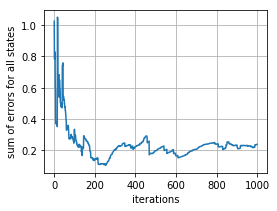

array([[ 0.86827726,  0.92254551,  0.97178669,  0.        ],
       [ 0.8155062 ,  0.        ,  0.78322673,  0.        ],
       [ 0.76196755,  0.70716726,  0.63453914,  0.38663495]])

In [10]:
TrueV =[[0.84881226, 0.90630541, 0.95748948, 0.],
        [0.797764, 0., 0.69906187, 0.],
        [0.7404234,  0.6895106,  0.64536512, 0.42192624]]

# Exact Monte-Carlo First Visit
lerror=[]
ntrial = 1000
V = np.zeros((3,4))
N = np.zeros((3,4))
for i in range(ntrial):
    lS,lr,la = gen_trial()
    visited = []
    for i,s in enumerate(lS):
        if s not in visited:
            visited.append(s)
            N[s] = N[s]+1
            alpha=1/N[s]
            V[s]=V[s]+alpha*(sum_returns(lr,i)-V[s])
    lerror.append(np.sum(np.abs(TrueV - V)))

plt.plot(lerror)
plt.grid()
plt.ylabel('sum of errors for all states')
plt.xlabel('iterations')
plt.show()
V

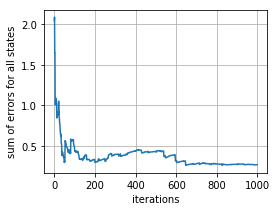

array([[ 0.85109435,  0.90420611,  0.95627123,  0.        ],
       [ 0.81216465,  0.        ,  0.70108121,  0.        ],
       [ 0.76333104,  0.71643446,  0.66647599,  0.59766966]])

In [11]:
# Exact Monte-Carlo Every Visit
lerror=[]
ntrial = 1000
V = np.zeros((3,4))
N = np.zeros((3,4))
for i in range(ntrial):
    lS,lr,la = gen_trial()
    for i,s in enumerate(lS):
            N[s] = N[s]+1
            alpha=1/N[s]
            V[s]=V[s]+alpha*(sum_returns(lr,i)-V[s])
    lerror.append(np.sum(np.abs(TrueV - V)))

plt.plot(lerror)
plt.grid()
plt.ylabel('sum of errors for all states')
plt.xlabel('iterations')
plt.show()
V

[[ 0.85840724  0.7928886   0.86622491  0.        ]
 [ 0.81130695  0.          0.57529973  0.        ]
 [ 0.77072817  0.71428307  0.63431416  0.48518622]] 0.1
[[ 0.83285596  0.90415166  0.95705498  0.        ]
 [ 0.77448756  0.          0.74956893  0.        ]
 [ 0.74630054  0.68926717  0.66823055  0.38658238]] 0.05
[[ 0.84965881  0.91028278  0.97075511  0.        ]
 [ 0.7894266   0.          0.68541384  0.        ]
 [ 0.70503335  0.65256711  0.5913966   0.23254702]] 0.01


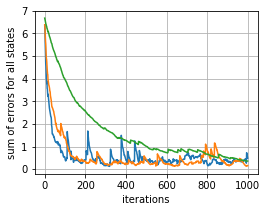

In [12]:
# Alpha Monte-Carlo
for alpha in [0.1,0.05,0.01]:
    lerror=[]
    ntrial = 1000
    V = np.zeros((3,4))
    for i in range(ntrial):
        lS,lr,la = gen_trial()
        visited = []
        for i,s in enumerate(lS):
            if s not in visited:
                visited.append(s)
                V[s]=V[s]+alpha*(sum_returns(lr,i)-V[s])
        lerror.append(np.sum(np.abs(TrueV - V)))

    plt.plot(lerror)
    print(V,alpha)
plt.grid()
plt.ylabel('sum of errors for all states')
plt.xlabel('iterations')
plt.show()


[[ 0.84647314  0.90796203  0.9802523   0.        ]
 [ 0.79101475  0.          0.46932915  0.        ]
 [ 0.76456672  0.73389316  0.62300256  0.35260279]] 0.2
[[ 0.85913925  0.88912247  0.93830693  0.        ]
 [ 0.79898705  0.          0.59170054  0.        ]
 [ 0.7456244   0.70726205  0.64153062  0.43524208]] 0.1
[[ 0.84787678  0.90554588  0.92978261  0.        ]
 [ 0.80042031  0.          0.68861376  0.        ]
 [ 0.74922522  0.68573271  0.6459878   0.43820281]] 0.05


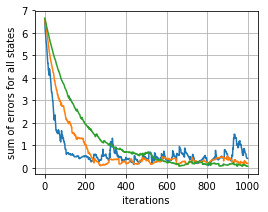

In [13]:
# Alpha Temporal Differences
for alpha in [0.2,0.1,0.05]:
    lerror=[]
    ntrial = 1000
    V = np.zeros((3,4))
    for i in range(ntrial):
        lS,lr,la = gen_trial()
        for i,s in enumerate(lS):
            visited.append(s)
            if i+1<len(lS):
                V[s]=V[s]+alpha*(lr[i]+gamma*V[lS[i+1]]-V[s])
            else:
                V[s]=V[s]+alpha*(lr[i]-V[s])
        lerror.append(np.sum(np.abs(TrueV - V)))

    plt.plot(lerror)
    print(V,alpha)
plt.grid()
plt.ylabel('sum of errors for all states')
plt.xlabel('iterations')
plt.show()
